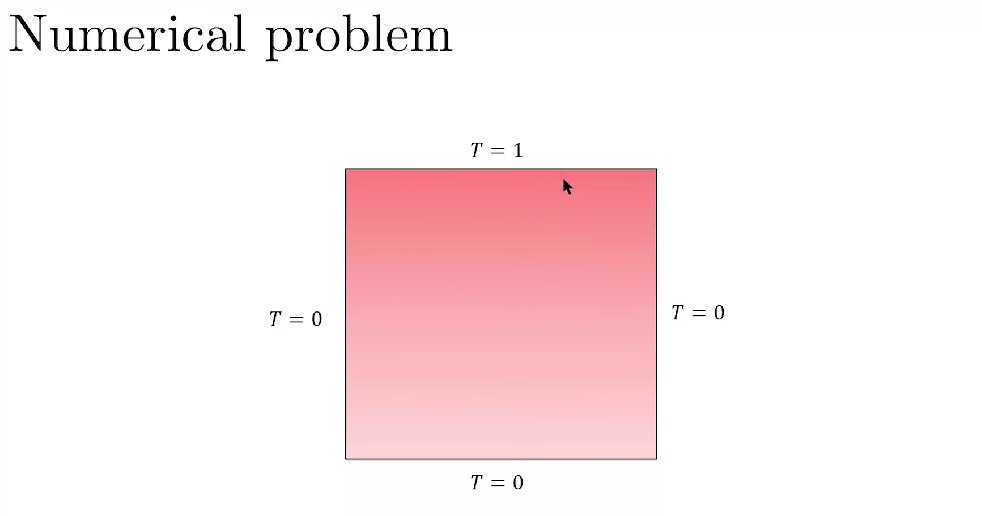

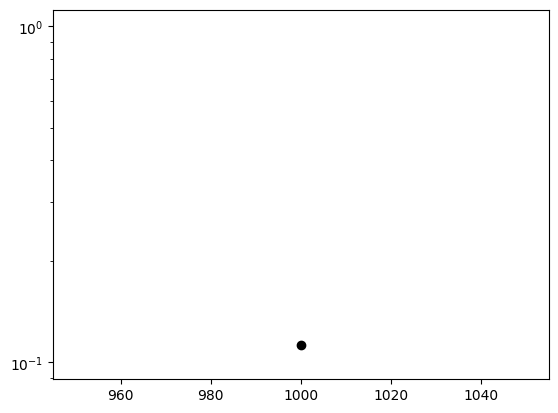

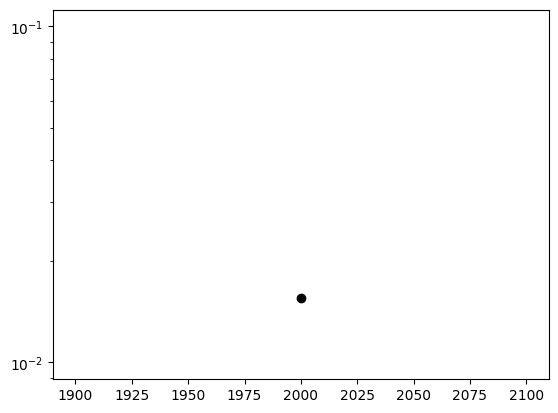

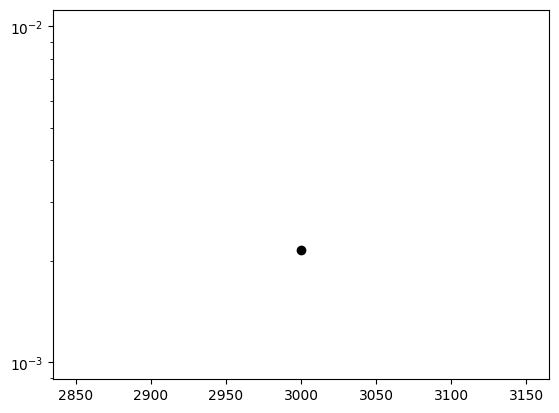

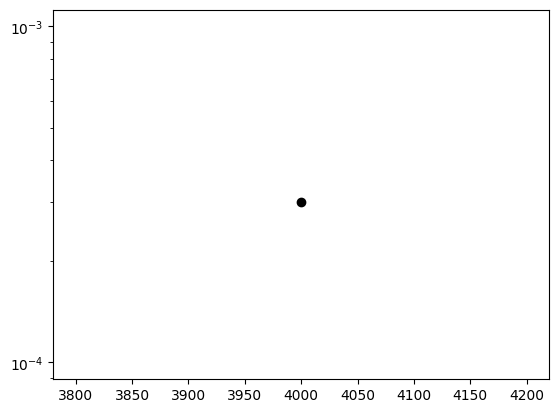

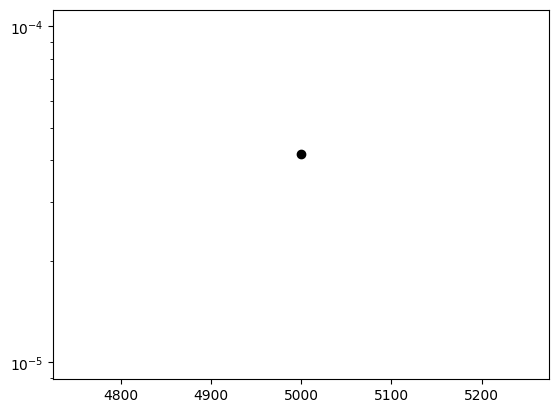

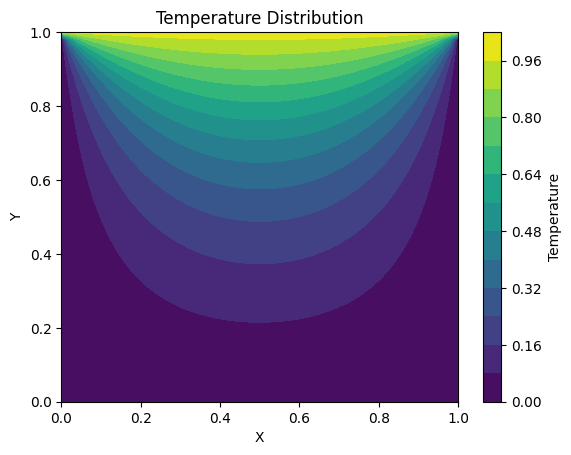

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 51 # Number of grid points
L = 1.0 # Length of the domain
h = np.float64(L/(N-1)) # Grid spacing
iterations = 0 # Number of iterations
k = 0.1 #thermal diffusivity
A = 0.001 #Cross-sectional area

# Initial conditions
T = np.zeros((N, N)) # Temperature array
T[N-1,:] = 1
#initializing iterated temperature

T_new = np.zeros((N, N)) # Temperature array
T_new[N-1,:] = 1

#error related variables
epsilon = 1e-5 # Convergence criterion
numerical_error = 1.0 # Initial error


while numerical_error > epsilon:
    for i in range(1, N-1):
        for j in range(1, N-1):
            a_E = np.float64(k*A/h)
            a_W = np.float64(k*A/h)
            a_N = np.float64(k*A/h)
            a_S = np.float64(k*A/h)
            a_P = a_E + a_W + a_N + a_S
            T_new[i,j] = (a_E*T[i,j+1]+a_W*T[i,j-1]+a_N*T[i+1,j]+a_S*T[i-1,j])/a_P

    
    #resetting the numervval error and recalcualte
    numerical_error = 0
    for i in range(1, N-1):
        for j in range(1, N-1):
            numerical_error += np.abs(T_new[i,j] - T[i,j])

    #iteraton and advancement
    iterations += 1
    T = T_new.copy()

    # Plotting numerical error
    if iterations % 1000 == 0:
        plt.figure(10)
        plt.semilogy(iterations, numerical_error, 'ko')
        plt.pause(0.01)

# Plotting the final temperature distribution
x_dom = np.arange(N)*h
y_dom =np.arange(N)*h
[X,Y] = np.meshgrid(x_dom, y_dom)

plt.figure(11)
plt.contourf(X, Y, T, 12)
plt.grid(False)
plt.title('Temperature Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Temperature')
plt.show()








2. With Heat Source
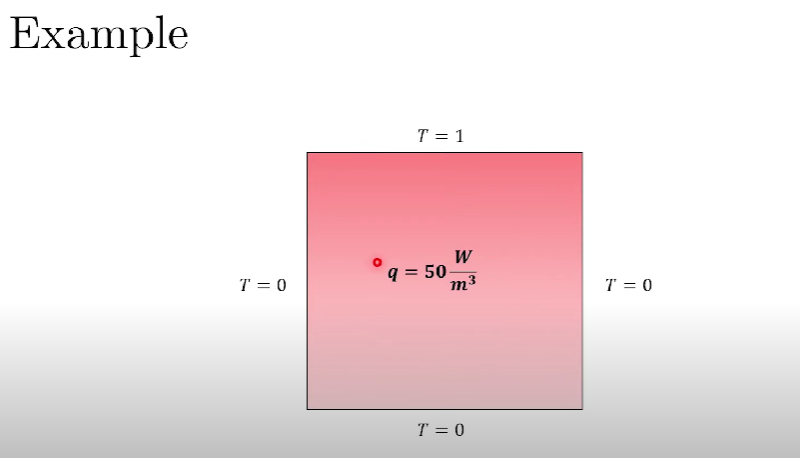

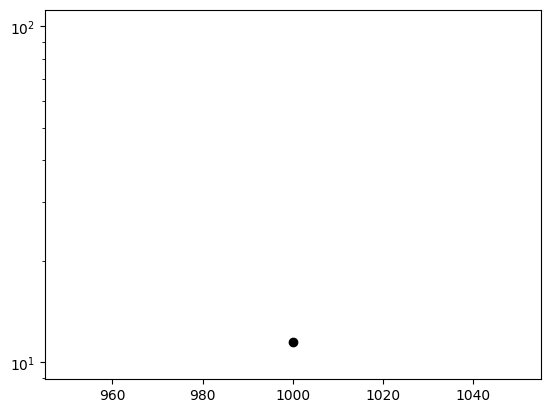

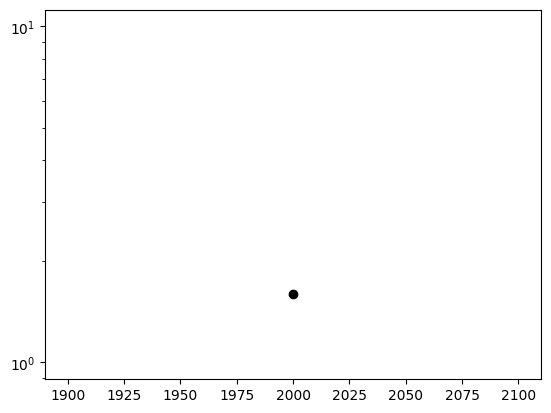

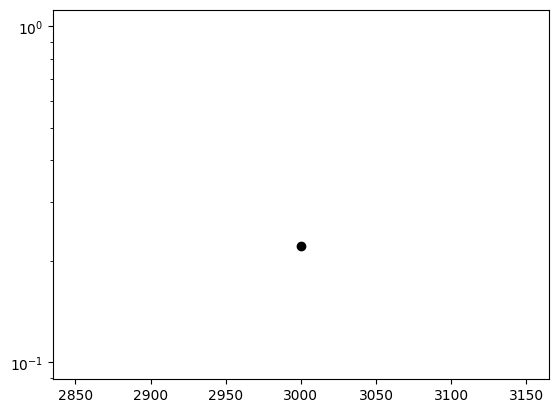

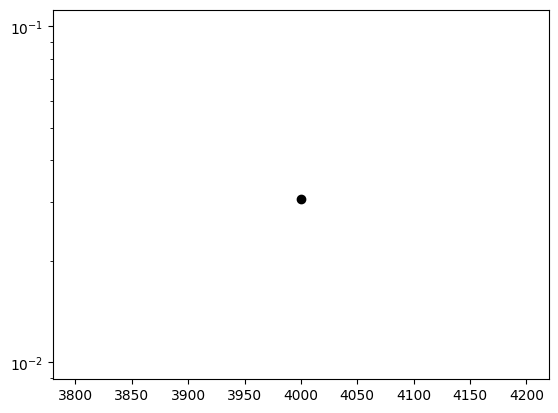

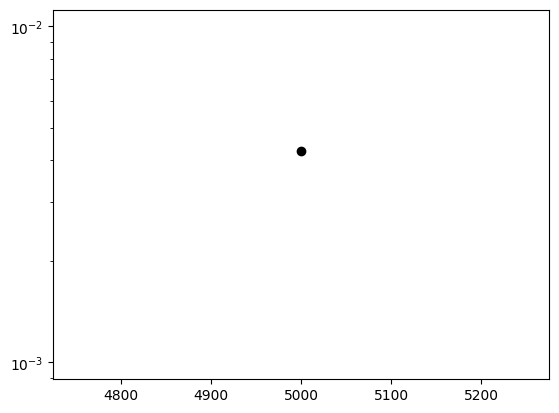

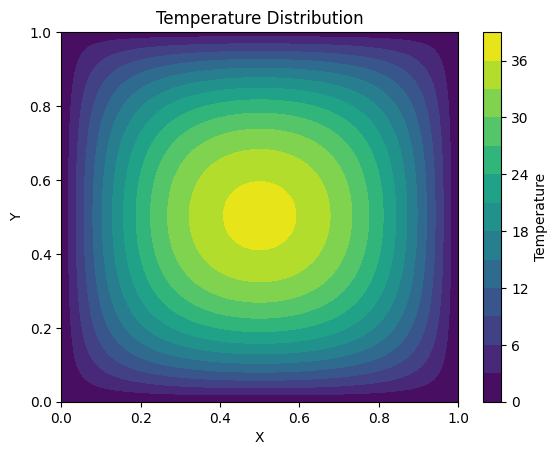

In [3]:
import numpy as np
import matplotlib.pyplot as plt

N = 51 # Number of grid points
L = 1.0 # Length of the domain
h = np.float64(L/(N-1)) # Grid spacing
iterations = 0 # Number of iterations
k = 0.1 #thermal diffusivity
A = 0.001 #Cross-sectional area
q = 50 #W/m^3
# Initial conditions
T = np.zeros((N, N)) # Temperature array
T[N-1,:] = 1
#initializing iterated temperature

T_new = np.zeros((N, N)) # Temperature array
T_new[N-1,:] = 1

#error related variables
epsilon = 1e-3 # Convergence criterion
numerical_error = 1.0 # Initial error


while numerical_error > epsilon:
    for i in range(1, N-1):
        for j in range(1, N-1):
            a_E = np.float64(k*A/h)
            a_W = np.float64(k*A/h)
            a_N = np.float64(k*A/h)
            a_S = np.float64(k*A/h)
            a_P = a_E + a_W + a_N + a_S
            T_new[i,j] = (a_E*T[i,j+1]+a_W*T[i,j-1]+a_N*T[i+1,j]+a_S*T[i-1,j] +h*q*A)/a_P

    
    #resetting the numervval error and recalcualte
    numerical_error = 0
    for i in range(1, N-1):
        for j in range(1, N-1):
            numerical_error += np.abs(T_new[i,j] - T[i,j])

    #iteraton and advancement
    iterations += 1
    T = T_new.copy()

    # Plotting numerical error
    if iterations % 1000 == 0:
        plt.figure(10)
        plt.semilogy(iterations, numerical_error, 'ko')
        plt.pause(0.01)

# Plotting the final temperature distribution
x_dom = np.arange(N)*h
y_dom =np.arange(N)*h
[X,Y] = np.meshgrid(x_dom, y_dom)

plt.figure(11)
plt.contourf(X, Y, T, 12)
plt.grid(False)
plt.title('Temperature Distribution')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Temperature')
plt.show()






